In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import csv
import matplotlib.pyplot as plt

In [3]:
#Load the Data
data = pd.read_csv('dataset.csv')

In [5]:
data

,House_Price,Square_Footage,Num_Bedrooms,Num_Bathrooms
0,350000,2200,3,2
1,500000,2800,4,3
2,280000,1500,2,1
3,600000,3500,5,4
4,400000,2600,3,2
5,320000,1900,3,2
6,450000,3200,4,3
7,550000,4000,5,4
8,380000,2400,3,2
9,700000,4500,6,4


In [7]:
# Split the dataset into features and target variable
x = data[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms']].values

In [9]:
x

array([[2200,    3,    2],
       [2800,    4,    3],
       [1500,    2,    1],
       [3500,    5,    4],
       [2600,    3,    2],
       [1900,    3,    2],
       [3200,    4,    3],
       [4000,    5,    4],
       [2400,    3,    2],
       [4500,    6,    4],
       [2700,    4,    2],
       [2000,    3,    2],
       [3000,    4,    3],
       [3800,    5,    4],
       [1800,    3,    1],
       [2500,    4,    2]], dtype=int64)

In [11]:
y=data[['House_Price']].values

In [13]:
y

array([[350000],
       [500000],
       [280000],
       [600000],
       [400000],
       [320000],
       [450000],
       [550000],
       [380000],
       [700000],
       [420000],
       [330000],
       [480000],
       [520000],
       [300000],
       [430000]], dtype=int64)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [17]:
X_train

array([[3800,    5,    4],
       [2600,    3,    2],
       [1500,    2,    1],
       [1800,    3,    1],
       [2700,    4,    2],
       [4000,    5,    4],
       [2500,    4,    2],
       [2000,    3,    2],
       [3500,    5,    4],
       [2200,    3,    2],
       [1900,    3,    2],
       [3000,    4,    3]], dtype=int64)

In [19]:
X_test

array([[2800,    4,    3],
       [3200,    4,    3],
       [2400,    3,    2],
       [4500,    6,    4]], dtype=int64)

In [21]:
y_train

array([[520000],
       [400000],
       [280000],
       [300000],
       [420000],
       [550000],
       [430000],
       [330000],
       [600000],
       [350000],
       [320000],
       [480000]], dtype=int64)

In [23]:
y_test

array([[500000],
       [450000],
       [380000],
       [700000]], dtype=int64)

In [27]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [29]:
X_train

array([[ 1.51246118,  1.41421356,  1.52611672],
       [-0.03218003, -0.70710678, -0.40160966],
       [-1.44810113, -1.76776695, -1.36547286],
       [-1.06194083, -0.70710678, -1.36547286],
       [ 0.09654008,  0.35355339, -0.40160966],
       [ 1.76990139,  1.41421356,  1.52611672],
       [-0.16090013,  0.35355339, -0.40160966],
       [-0.80450063, -0.70710678, -0.40160966],
       [ 1.12630088,  1.41421356,  1.52611672],
       [-0.54706043, -0.70710678, -0.40160966],
       [-0.93322073, -0.70710678, -0.40160966],
       [ 0.48270038,  0.35355339,  0.56225353]])

In [31]:
X_test

array([[ 0.22526018,  0.35355339,  0.56225353],
       [ 0.74014058,  0.35355339,  0.56225353],
       [-0.28962023, -0.70710678, -0.40160966],
       [ 2.41350189,  2.47487373,  1.52611672]])

In [33]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

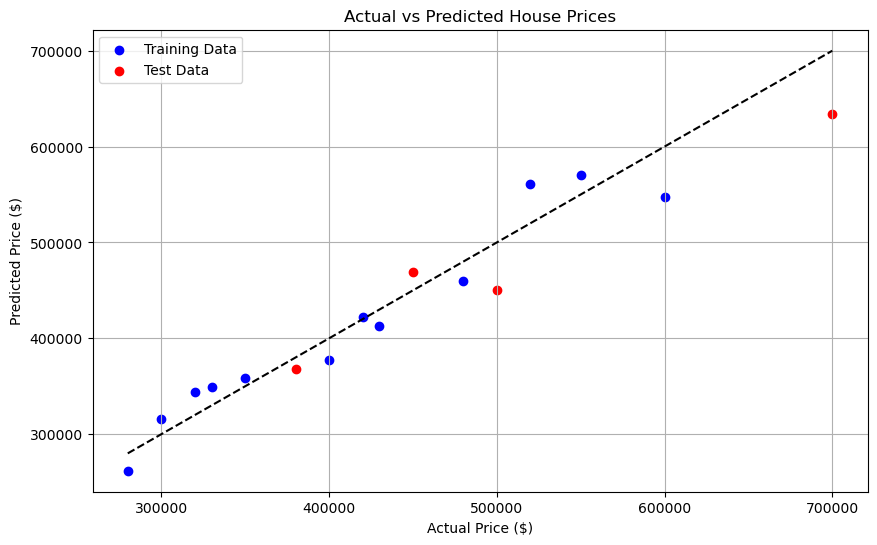

In [37]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(y_train, y_pred_train, color='blue', label='Training Data')

# Plot test data
plt.scatter(y_test, y_pred_test, color='red', label='Test Data')

# Plot a line to show perfect predictions
plt.plot([min(y), max(y)], [min(y), max(y)], color='black', linestyle='--')

plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 25436.85037117755
Testing RMSE: 42823.43444008613


C:\Users\Haier\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Haier\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
